In [1]:
import numpy as np
import pandas as pd
import seaborn as sns # libreria utile per matrice di confusione
# import plotly.express as px
from collections import Counter
from matplotlib import pyplot as plt
from sklearn import tree

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, make_scorer, confusion_matrix, precision_recall_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import shap
import pickle

In [2]:
plt.rcParams.update({'font.size': 28, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

In [3]:
dataset=pd.read_csv('best_dataset.csv', header = 0)

In [4]:
all_features_names = {'balance': 'Balance',
 'lifetime': 'Lifetime',
 'tx_in': 'Tx_in',
 'tx_out': 'Tx_out',
 'investment_in': 'Investment_in',
 'payment_out': 'Payment_out',
 'investment_to_contract/tx_in': 'Investment_in/Tx_in',
 'payment_from_contract/tx_out': 'Payment_out/Tx_out',
 '#addresses_paying_contract': '#addresses_paying_contract',
 '#addresses_paid_by_contract': '#addresses_paid_by_contract',
 'mean_v1': 'Mean_v1',
 'sdev_v1': 'Sdev_v1',
 'mean_v2': 'Mean_v2',
 'sdev_v2': 'Sdev_v2',
 'paid_rate': 'Paid_rate',
 'paid_one': 'Paid_one',
 'percentage_some_tx_in': 'Percentage_some_tx_in',
 'sdev_tx_in': 'Sdev_tx_in',
 'percentage_some_tx_out': 'Percentage_some_tx_out',
 'sdev_tx_out': 'Sdev_tx_out',
 'known_rate': 'Known_rate',
 'owner_gets_eth_Wo_investing': 'Initiator_gets_eth_Wo_investing',
 'owner_gets_eth_investing': 'Initiator_gets_eth_investing',
 'owner_no_eth': 'Initiator_no_eth',
 'skew_v1': 'Skew_v1',
 'N_maxpayment': 'N_maxpayment',
 'skew_v2': 'Skew_v2'
}

In [5]:
dataset.rename(columns=all_features_names,inplace=True)

In [9]:
# dataset.columns = [c.replace('_','-').replace('#','n.')for c in dataset.columns]

# X = dataset.iloc[:, 1:-1] # rimuovo la prima colonna che contiene gli indirizzi
# y = dataset.iloc[:, -1]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42, stratify=y) 
# cls.fit(X_train,y_train.values.ravel())


In [10]:

# d = '../dataset B2'
# print(d)

# dataset = pd.read_csv(d+'/dataset+.csv', header = 0)
# target = pd.read_csv(d+'/target.csv', header = 0)

# # leggo il dataset ed il target

dataset=pd.read_csv('best_dataset.csv')
dataset.rename(columns=all_features_names,inplace=True)
dataset.columns = [c.replace('_','-').replace('#','n.')for c in dataset.columns]

X = dataset.iloc[:, 1:-1] # rimuovo la prima colonna che contiene gli indirizzi
y = dataset.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42, stratify=y) 

features_names = list(X.columns) # ottengo i nomi delle features
pairs_number_features = list() # creo una lista che contiene coppie <#_feature, nome_feature>
idx = 0

while idx < len(features_names):
    pair = (idx, features_names[idx])
    pairs_number_features.append(pair)
    idx+=1

print(pairs_number_features)



[(0, 'Balance'), (1, 'Lifetime'), (2, 'Tx-in'), (3, 'Tx-out'), (4, 'Investment-in'), (5, 'Investment-in/Tx-in'), (6, 'Payment-out/Tx-out'), (7, 'n.addresses-paying-contract'), (8, 'n.addresses-paid-by-contract'), (9, 'Mean-v1'), (10, 'Sdev-v1'), (11, 'Mean-v2'), (12, 'Sdev-v2'), (13, 'Paid-rate'), (14, 'Paid-one'), (15, 'Percentage-some-tx-in'), (16, 'Sdev-tx-in'), (17, 'Percentage-some-tx-out'), (18, 'Sdev-tx-out'), (19, 'Known-rate'), (20, 'Initiator-gets-eth-Wo-investing'), (21, 'Skew-v1'), (22, 'N-maxpayment'), (23, 'Skew-v2')]


In [11]:
filename = 'best_feat_model.pkl'
cls = pickle.load(open(filename, 'rb'))

cls.fit(X_train,y_train.values.ravel())

Pipeline(steps=[('classifier',
                 LGBMClassifier(colsample_bytree=0.5, max_depth=15,
                                n_estimators=120, n_jobs=4, random_state=42,
                                reg_alpha=0.1, reg_lambda=10))])

In [12]:
X_test.columns

Index(['Balance', 'Lifetime', 'Tx-in', 'Tx-out', 'Investment-in',
       'Investment-in/Tx-in', 'Payment-out/Tx-out',
       'n.addresses-paying-contract', 'n.addresses-paid-by-contract',
       'Mean-v1', 'Sdev-v1', 'Mean-v2', 'Sdev-v2', 'Paid-rate', 'Paid-one',
       'Percentage-some-tx-in', 'Sdev-tx-in', 'Percentage-some-tx-out',
       'Sdev-tx-out', 'Known-rate', 'Initiator-gets-eth-Wo-investing',
       'Skew-v1', 'N-maxpayment', 'Skew-v2'],
      dtype='object')

In [13]:
X_train.columns

Index(['Balance', 'Lifetime', 'Tx-in', 'Tx-out', 'Investment-in',
       'Investment-in/Tx-in', 'Payment-out/Tx-out',
       'n.addresses-paying-contract', 'n.addresses-paid-by-contract',
       'Mean-v1', 'Sdev-v1', 'Mean-v2', 'Sdev-v2', 'Paid-rate', 'Paid-one',
       'Percentage-some-tx-in', 'Sdev-tx-in', 'Percentage-some-tx-out',
       'Sdev-tx-out', 'Known-rate', 'Initiator-gets-eth-Wo-investing',
       'Skew-v1', 'N-maxpayment', 'Skew-v2'],
      dtype='object')

In [14]:
# explainer = shap.Explainer(cls.named_steps['classifier'], X_test)
# shap_values = explainer(X_test)

explainer_tree = shap.TreeExplainer(cls.named_steps['classifier'])
shap_values_tree = explainer_tree.shap_values(X_test)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [15]:
def get_shaps(classifier, dataset):
    print(dataset.shape)
    explainer = shap.Explainer(classifier, dataset)
    shap_values = explainer(dataset,check_additivity=False)

    explainer_tree = shap.TreeExplainer(classifier)
    shap_values_tree = explainer_tree.shap_values(dataset)
    return shap_values,shap_values_tree



In [16]:
def plot_beeswarn(df,shap_values,filename,class_index=1):
    shap.summary_plot(shap_values[class_index], df,show=False,max_display=10,color='red',color_bar=True,class_names=True)
    fig = plt.gcf() # gcf means "get current figure"
    ax = plt.gca() #gca means "get current axes"

    fig.axes[1].yaxis.get_label().set_fontsize(24)
    # fig.axes[1].set_fontsize(24)
    plt.xlabel('SHAP value',fontsize=20)
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    plt.tight_layout()
    plt.savefig('{}.png'.format(filename))
    


In [17]:
explainer = shap.Explainer(cls.named_steps['classifier'], X_test)
shap_values = explainer(X_test,check_additivity=False)

# explainer_tree = shap.TreeExplainer(cls.named_steps['classifier'])
# shap_values_tree = explainer_tree.shap_values(X_test)

In [18]:
shap_values, shap_values_tree = get_shaps(cls.named_steps['classifier'], X_test)

(885, 24)


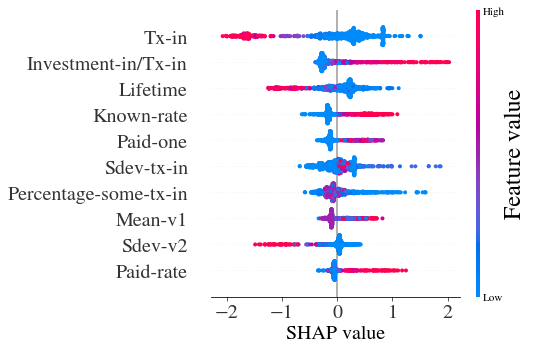

In [19]:
plot_beeswarn(X_test,shap_values_tree,'summary_swarn_ponzi',1)

# fig = shap.summary_plot(shap_values_tree[1], X_test, show=False,max_display=10)
# plt.xlabel('SHAP value',fontsize=24)
# # plt.ylabel('Feature Value',fontsize=24)
# plt.yticks()
# plt.savefig('summary_swarn_ponzi.png')

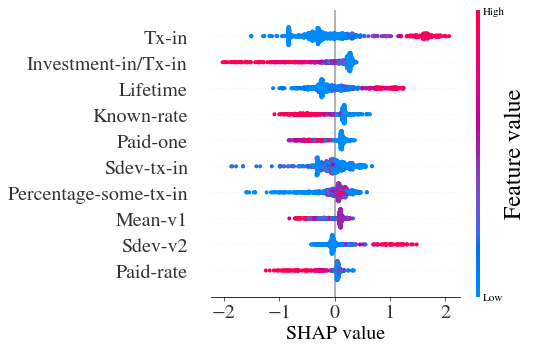

In [20]:
plot_beeswarn(X_test,shap_values_tree,'summary_swarn_not_ponzi',0)



In [21]:
columns_dependence = ['Tx-in','Lifetime','Investment-/tx-in','known-rate','paid-one']

In [22]:
# explainer = shap.TreeExplainer(cls.named_steps['classifier'])
# shap_values_test = explainer.shape_values(X_test)

for i in range(0,len(columns_dependence)):
    for j in range(i+1,len(columns_dependence)):
        name = columns_dependence[i]
        name2 = columns_dependence[j]
        fig = shap.dependence_plot(name, shap_values_tree[1], X_test,interaction_index=name2,show=False)
        name_f=name.replace('/','-')
        name2_f=name2.replace('/','-')
        filename = '{}_{}.png'.format(name_f,name2_f)
        plt.savefig(filename)
        plt.show()

ValueError: Could not find feature named: tx-in

### Analisi dei falsi positivi e falsi negativi

In [96]:
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_curve(fpr, tpr, auc_score,label=None,plt_name=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=18) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=18)
    plt.title('AUC Score: {:.3f}'.format(auc_score),fontsize=18)
    plt.grid(True)
    if plt_name:
        plt.savefig('{}.png'.format(plt_name))
    plt.show()


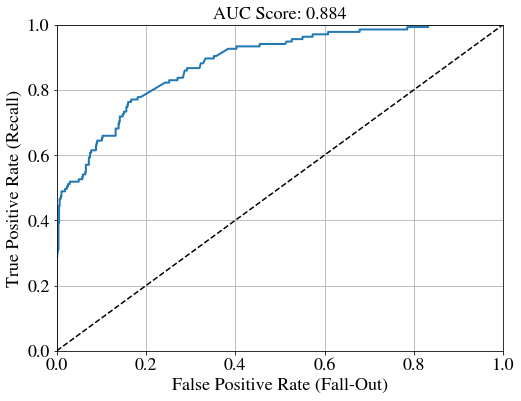

<Figure size 720x720 with 0 Axes>

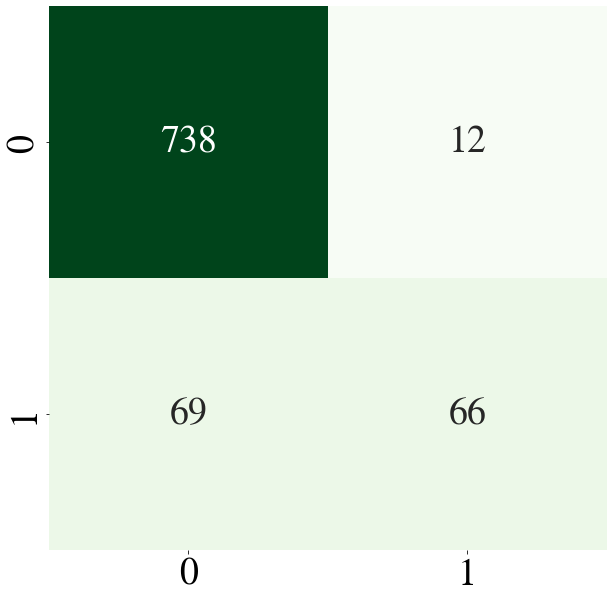

In [112]:
y_pred_proba = cls.predict_proba(X_test)[:, 1]
y_pred = cls.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test,y_pred_proba)    
auc_score = roc_auc_score(y_test,y_pred_proba)

plt.figure(figsize=(8, 6))                                    
plot_roc_curve(fpr, tpr, auc_score,plt_name='best_classifier')

plt.figure(figsize=(10,10))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
ax = sns.heatmap(cm, annot=True, cmap='Greens', cbar=False, fmt='d',annot_kws={"fontsize":38})
#     cbar = ax.collections[0].colorbar
#     cbar.ax.tick_params(labelsize=18)
plt.xticks(fontsize=38)
plt.yticks(fontsize=38)
plt.savefig('confusion_matrix_best.png')
plt.show()

In [99]:
df_check = X_test.copy()
df_check['prediction'] = y_pred
df_check['label'] = y_test
df_check['correct'] = df_check.apply(lambda x: 1 if x.prediction == x.label else 0,axis=1)

In [100]:
df_check['probability'] = y_pred_proba

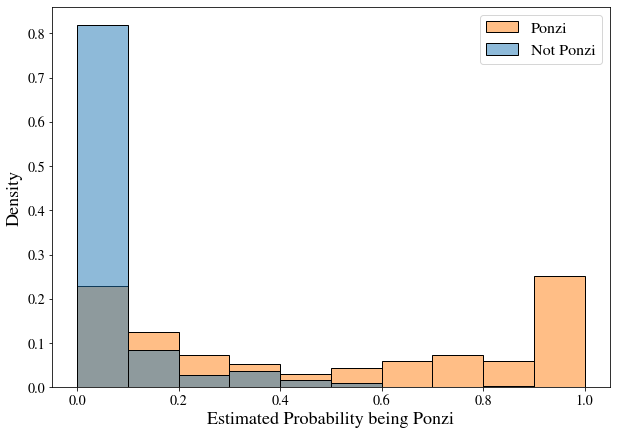

In [109]:
fig=plt.figure(figsize=(10,7))
sns.histplot(data=df_check,x='probability',hue='label',bins=np.arange(0,1.1,0.1),stat='probability',common_norm=False)
plt.xlabel('Estimated Probability being Ponzi',fontsize=18)
plt.ylabel('Density',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(loc='best',labels=['Ponzi','Not Ponzi'],fontsize=16)
plt.savefig('distribution_probability.png')

In [103]:
df_check['FP'] = df_check.apply(lambda x: 1 if x['prediction'] == 1 and x['correct'] ==0 else 0, axis=1 ) 
df_check['FN'] = df_check.apply(lambda x: 1 if x['prediction'] == 0 and x['correct'] ==0 else 0, axis=1 ) 

In [104]:
df_fp = df_check[df_check['FP']==1].copy()
df_fn = df_check[df_check['FN']==1].copy()

In [47]:
# def plot_beeswarn(df,shap_values,filename):
#     fig = shap.summary_plot(shap_values[1], df,show=False,max_display=10)
#     plt.savefig('{}.png'.format(filename))

(12, 24)


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


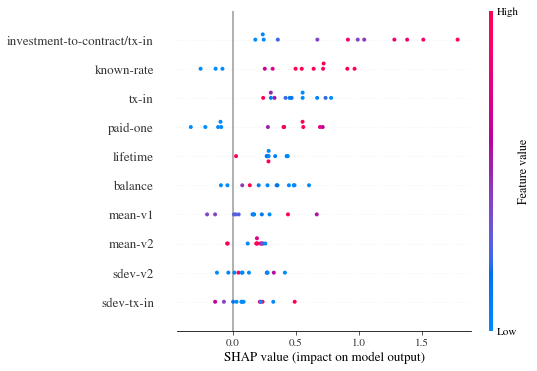

In [105]:
df_shap_fp = df_fp.sort_values('probability',ascending=False)[X_test.columns].copy()
shap_fp, shap_fp_tree = get_shaps(cls.named_steps['classifier'],df_shap_fp)
plot_beeswarn(df_shap_fp,shap_fp_tree,'../../plots/summary_fp_plot_shap',1)
# fig = shap.summary_plot(c[1], df_shap_fp,show=False,max_display=10)
# plt.savefig('../../plots/summary_fp_plot_shap.png')

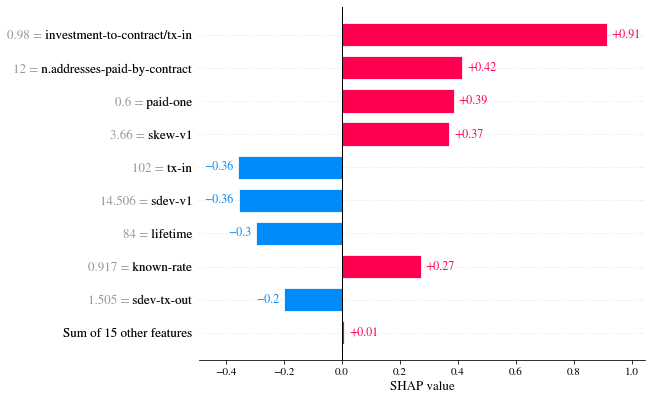

In [106]:
shap.plots.bar(shap_fp[0],show_data=True)

(69, 24)


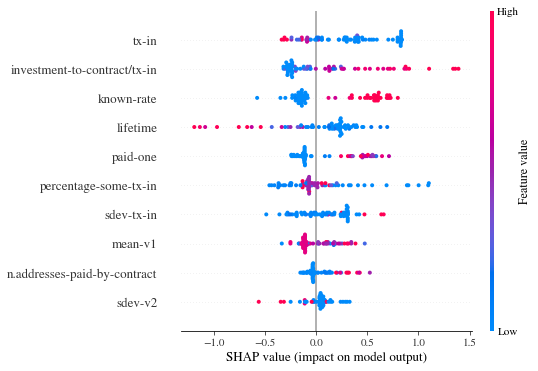

In [107]:
df_shap_fn = df_fn.sort_values('probability',ascending=False)[X_test.columns].copy()
shap_fn, shap_fn_tree = get_shaps(cls.named_steps['classifier'],df_shap_fn)
plot_beeswarn(df_shap_fn,shap_fn_tree,'../../plots/summary_fn_plot_shap')
# fig = shap.summary_plot(shap_fn_tree[1], df_shap_fn,show=False,max_display=10)
# plt.savefig('../../plots/summary_fn_plot_shap.png')

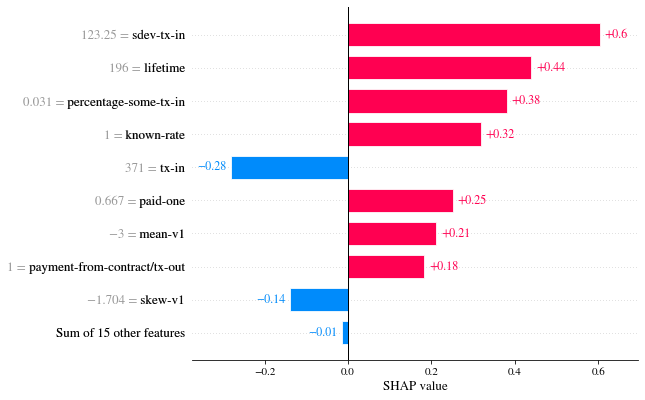

In [108]:
shap.plots.bar(shap_fn[0],show_data=True)